<h1> Effectively Subsampled Quadratures

Pranay Seshadri

How to effectively subsample your quadratures in 7 easy steps. Demo for SIAM CSE 2017. You will need to download the latest version of the code from  <em>www.effective-quadratures.org </em>. You will also need numpy.

# 0. Copy and paste the headers below

In [1]:
%matplotlib inline
from effective_quadratures.indexset import IndexSet
from effective_quadratures.parameter import Parameter
from effective_quadratures.effectivequads import EffectiveSubsampling
from effective_quadratures.plotting import scatterplot, coeffplot2D
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 1. Define your function

In [2]:
def fun(zeta):
    return np.exp(zeta[0] + zeta[1])

# 2. Define the parameters

In [3]:
order = 15
zeta_1 = Parameter(param_type="Uniform", lower=-1, upper=1, points=order+1)
zeta_2 = Parameter(param_type="Uniform", lower=-1, upper=1, points=order+1)
params = [zeta_1, zeta_2]

# 3. Select an appropriate basis

In [4]:
basis = IndexSet('Hyperbolic basis', [order, order], q = 0.5)

# 4. Select number of subsamples

In [5]:
EQ = EffectiveSubsampling(params, basis)
cardinality = EQ.least_no_of_subsamples_reqd()
EQ.set_no_of_evals(cardinality)

# 5. Solve the least squares problem!

In [6]:
x , condition_number = EQ.computeCoefficients(fun)

# 6. Prune down the number of columns (if required)

In [7]:
EQ.prune(5)
x , condition_number = EQ.computeCoefficients(fun)

# 7. Now generate some plots

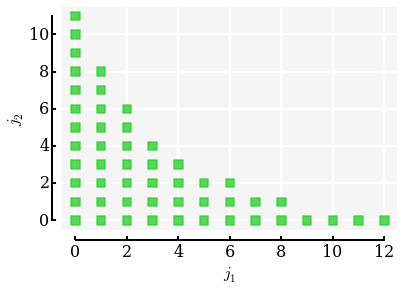

In [8]:
EQ.index_set.plot('picture.png')

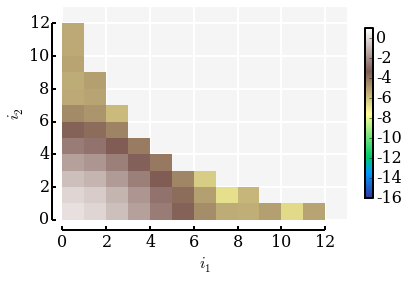

In [9]:
coeffplot2D(x, EQ.index_set, r'$i_1$', r'$i_2$', 'figure.png')